## Data Breach Analytics 2005 - 2017 (Part 2)

**By Miriam Rodriguez**


### Exploratory Data Analysis(EDA) and Data Visualization
- Correlation 
- Basic Statistical Analysis 
- Hypothesis Testing
- Data visualization
- Insights from EDA and data visualization

### Data Description

#### Dataset
- Dataset name:              databreach_cleaned.csv
- Duration of the data:      2005 through 2017

#### Data Breach Types
- 1: CARD - Payment Card Fraud:    Fraud involving debit and credit cards that is not accomplished via hacking (e.g.                                                skimming devices at point-of-service terminals).
- 2: HACK - Hacking or Malware:    Hacked by outside party or infected by malware
- 3: INSD - Insider:               Someone with legitimate access intentionally breaches information, such as an employee,                                          contractor, or customer)
- 4: PHYS - Physical Loss:         Includes paper documents that are lost, discarded, or stolen (non-electronic)
- 5: PORT - Portable Device:       Lost, discarded, or stolen laptop, PDA, smartphone, memory stick, CDs, hard drive, data                                          tape, etc.
- 6: STAT - Stationary Device:     Stationary computer loss (lost, inappropriately accessed, discarded, or stolen computer                                          or server not designed for mobility)
- 7: DISC - Unintended Disclosure: Unintended disclosure (not involving hacking, intentional breach, or physical loss i.e.                                          sensitive information posted publicly, mishandled, sent to the wrong party via publishing                                      online, sending in an email, sending in a mailing or sending via fax.
- 0: Unknown

#### Institution/Organization) Type
Numeric/ Alpha/  Description
- 1     BSF - Businesses - Financial and Insurance Services
- 2	    BSO - Businesses - Other
- 3  	BSR - Businesses - Retail/Merchant – Including Online Retail
- 4 	EDU - Educational Institutions
- 5 	GOV - Government & Military
- 6 	MED - Healthcare - Medical Providers & Medical Insurance Services
- 7 	NGO - Nonprofit Organizations

#### Data elements/column names
1.	Breach_Year: Year Breach information released to public 
2.	Company: Company breached (text)
3.	State: State of breached company (text)
4.	Breach_Type: Refer to four-character Breach Type above
5.	Organization_Type: Refer to three-character Institution/Organization Type above
6.	Total_Records: Number of records breached (integer)
7.	Descriptiont: Text describing breach (text)
8.	Breach_Type_CAT: Numerical assignment to four-character Breach Type above
9.	Organization_Type_CAT: Numerical assignment to three-character Institution/Organization Type above
10.	Latitude: Location Latitude (signed numeric long)
11.	Longitude: Location Longitude (signed numeric long)

#### State column names 
1 - 53

#### Breach_Year column names
1. 2005
2. 2006
3. 2007
4. 2008
5. 2009
6. 2010
7. 2011
8. 2012
9. 2013
10. 2014
11. 2015
12. 2016
13. 2017
14. 2018

### Importing packages 

In [1]:
# the popular python package for data visualization
import matplotlib.pyplot as plt
%matplotlib inline

# import some other packages
import numpy as np
import pandas as pd
import seaborn as sns  #package for statistical data visualization
from scipy import stats
from pandas.tools import plotting
import datetime
from sklearn import linear_model



# Importing Data & Processing (ETL)

In [2]:
#import breach data ... open or read the breach data
df = pd.read_csv("databreach_cleaned.csv")
df.head()

,Breach_Year,Company,State,Breach_Type,Organization_Type,Total_Recs,Description,Breach_Type_CAT,Organization_Type_CAT,State_CAT,Year_CAT,GDP
0,2006,"Deloitte & Touche, McAfee",United States,PORT,BSO,9290,"An external auditor lost a CD with names, Soci...",5,2,0,2,72466970
1,2007,"TennCare, Americhoice Inc.",United States,PORT,MED,67000,"There are 67,000 TennCare \r\n enro...",5,6,0,3,75725457
2,2007,Mercer Health and Benefits,United States,PORT,BSF,10500,A laptop computer was stolen from a vehicle.,5,1,0,3,75725457
3,2007,"Fidelity Investments, Dairy Farmers of America",United States,PORT,BSF,69,A Fidelity laptop used by a former Fidelity em...,5,1,0,3,75725457
4,2007,Dai Nippon,United States,INSD,BSO,0,A former contract worker of a Japanese commerc...,3,2,0,3,75725457


In [3]:
# Describe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8177 entries, 0 to 8176
Data columns (total 12 columns):
Breach_Year              8177 non-null int64
Company                  8177 non-null object
State                    8177 non-null object
Breach_Type              8177 non-null object
Organization_Type        8177 non-null object
Total_Recs               8177 non-null int64
Description              8177 non-null object
Breach_Type_CAT          8177 non-null int64
Organization_Type_CAT    8177 non-null int64
State_CAT                8177 non-null int64
Year_CAT                 8177 non-null int64
GDP                      8177 non-null int64
dtypes: int64(7), object(5)
memory usage: 766.7+ KB


**There are 8177 records total.**  

# Basic Statistics and Visualization

### Breach_Type, Organization_Type, Breach_Year and State are categories

In [4]:
# Convert year to string to get meaningful statistics
df['Breach_Year'] = df['Breach_Year'].astype(str)

In [5]:
#describe the column Breach_Year only (e.g., count, unique, frequency)
df['Breach_Year'].describe()

count     8177
unique      14
top       2014
freq       887
Name: Breach_Year, dtype: object

#### Shows 2014 as top breach year with a frequency of 887 breaches

In [6]:
# Change it back if necessary
# df['Breach_Year'] = df['Total_Recs'].astype(np.int64)

In [7]:
df.groupby(['Breach_Year']).size()

Breach_Year
2005    136
2006    482
2007    454
2008    355
2009    271
2010    801
2011    788
2012    882
2013    852
2014    887
2015    539
2016    804
2017    602
2018    324
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000CC164E0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000CEA4F98>]], dtype=object)

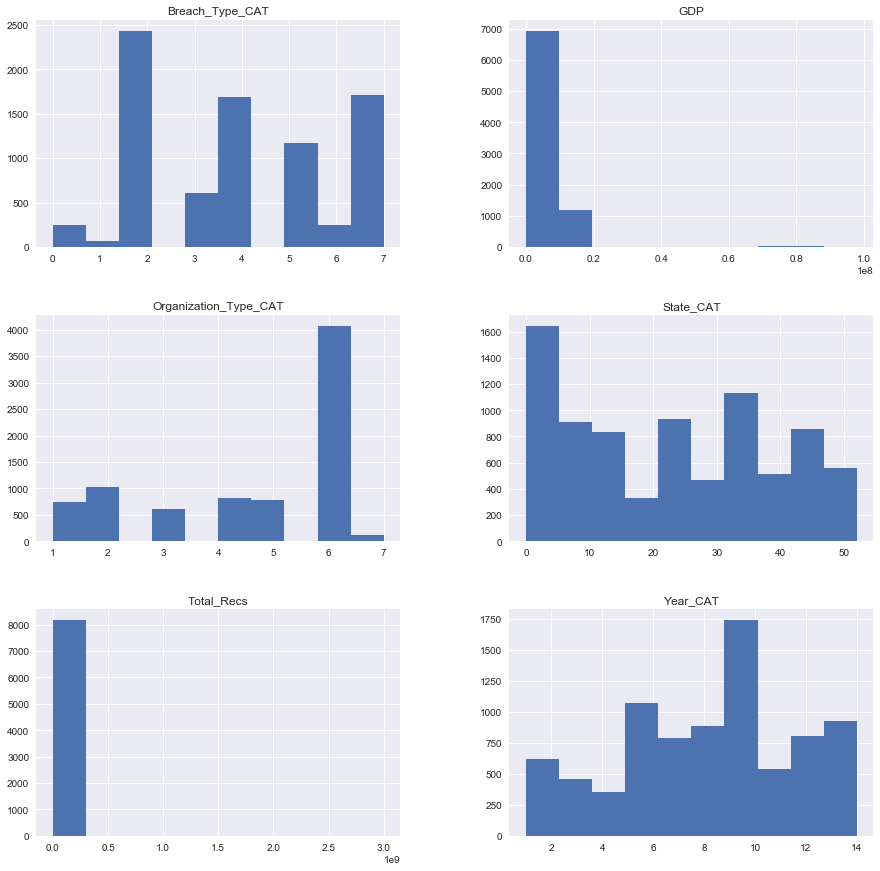

In [13]:
df.hist(figsize=(15,15))

### Organization Type Statistics

### 'MED' is top organization type

In [8]:
# Counts of affected organization types
df.groupby(['Organization_Type']).size()

Organization_Type
BSF     746
BSO    1028
BSR     615
EDU     818
GOV     775
MED    4077
NGO     118
dtype: int64

In [9]:
#describe the column Type of Organization only (e.g., count, unique, frequency)
df['Organization_Type'].describe()

count     8177
unique       7
top        MED
freq      4077
Name: Organization_Type, dtype: object

In [10]:
# Counts of affected organization types
df.groupby(['Organization_Type_CAT']).size()

Organization_Type_CAT
1     746
2    1028
3     615
4     818
5     775
6    4077
7     118
dtype: int64

(array([  746.,  1028.,     0.,   615.,     0.,   818.,   775.,     0.,
         4077.,   118.]),
 array([ 1. ,  1.6,  2.2,  2.8,  3.4,  4. ,  4.6,  5.2,  5.8,  6.4,  7. ]),
 <a list of 10 Patch objects>)

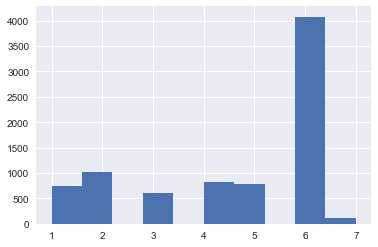

In [14]:
# using matplotlib
# histogram of Organization Type

plt.hist(df['Organization_Type_CAT'])

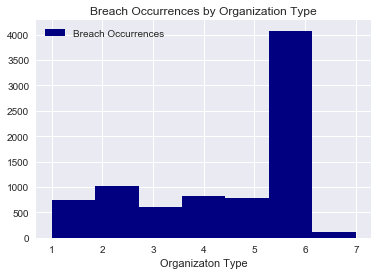

In [15]:
# using matplotlib
# Histogram of Breach occurrences by Organization Type - Visualization
bins = 7
plt.hist(df['Organization_Type_CAT'], bins, color='navy', label="Breach Occurrences")
plt.xlabel('Organizaton Type')
plt.title('Breach Occurrences by Organization Type')
plt.legend()

### Breach Type Statistics

### 'HACK' is the top breach type.

In [16]:
# Counts of breach types
df.groupby(['Breach_Type']).size()

Breach_Type
CARD      68
DISC    1708
HACK    2431
INSD     609
PHYS    1691
PORT    1172
STAT     249
UNKN     249
dtype: int64

In [17]:
#describe the column Type of Breach only (e.g., count, unique, frequency)
df['Breach_Type'].describe()


count     8177
unique       8
top       HACK
freq      2431
Name: Breach_Type, dtype: object

In [18]:
# Counts of breach types
df.groupby(['Breach_Type_CAT']).size()

Breach_Type_CAT
0     249
1      68
2    2431
3     609
4    1691
5    1172
6     249
7    1708
dtype: int64

(array([  249.,    68.,  2431.,     0.,   609.,  1691.,     0.,  1172.,
          249.,  1708.]),
 array([ 0. ,  0.7,  1.4,  2.1,  2.8,  3.5,  4.2,  4.9,  5.6,  6.3,  7. ]),
 <a list of 10 Patch objects>)

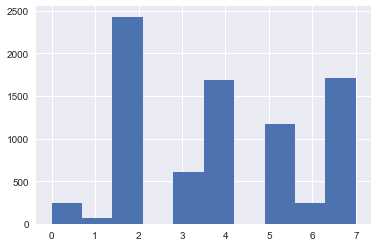

In [19]:
# using matplotlib
# histogram of Breach Type

plt.hist(df['Breach_Type_CAT'])

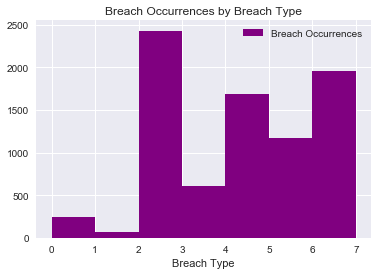

In [20]:
# using matplotlib
# Histogram of Breach occurrences by Breach Type - Visualization
bins = 7
plt.hist(df['Breach_Type_CAT'], bins, color='purple', label="Breach Occurrences")
plt.xlabel('Breach Type')
plt.title('Breach Occurrences by Breach Type')
plt.legend()

In [25]:
df['Company'] = df['Company'].replace({',': ''}, regex=True)
df['Company'].head(5)

0                         Deloitte & Touche McAfee
1                     TennCare Americhoice Inc.   
2                       Mercer Health and Benefits
3    Fidelity Investments Dairy Farmers of America
4                                       Dai Nippon
Name: Company, dtype: object

In [26]:
# Convert to string to get meaningful statistics
df['Breach_Type_CAT'] = df['Breach_Type_CAT'].astype(str)
df['Organization_Type_CAT'] = df['Organization_Type_CAT'].astype(str)
df['State_CAT'] = df['State_CAT'].astype(str)
df['Year_CAT'] = df['Year_CAT'].astype(str)
df.head()

,Breach_Year,Company,State,Breach_Type,Organization_Type,Total_Recs,Description,Breach_Type_CAT,Organization_Type_CAT,State_CAT,Year_CAT,GDP
0,2006,Deloitte & Touche McAfee,United States,PORT,BSO,9290,"An external auditor lost a CD with names, Soci...",5,2,0,2,72466970
1,2007,TennCare Americhoice Inc.,United States,PORT,MED,67000,"There are 67,000 TennCare \r\n enro...",5,6,0,3,75725457
2,2007,Mercer Health and Benefits,United States,PORT,BSF,10500,A laptop computer was stolen from a vehicle.,5,1,0,3,75725457
3,2007,Fidelity Investments Dairy Farmers of America,United States,PORT,BSF,69,A Fidelity laptop used by a former Fidelity em...,5,1,0,3,75725457
4,2007,Dai Nippon,United States,INSD,BSO,0,A former contract worker of a Japanese commerc...,3,2,0,3,75725457


In [27]:
df.groupby('Breach_Type').sum()

,Total_Recs,GDP
Breach_Type,,
CARD,9203036,319875031
DISC,2223075024,7470946102
HACK,7733557148,11954424614
INSD,83580556,2849375031
PHYS,39600563,7537388838
PORT,185650895,5637557225
STAT,16235932,1213825243
UNKN,202910247,955505891


In [28]:
# pivot for breach_type
df.groupby('Breach_Type').mean()

,Total_Recs,GDP
Breach_Type,,
CARD,1.353388e+05,4.704045e+06
DISC,1.301566e+06,4.374090e+06
HACK,3.181225e+06,4.917493e+06
INSD,1.372423e+05,4.678777e+06
PHYS,2.341843e+04,4.457356e+06
PORT,1.584052e+05,4.810202e+06
STAT,6.520455e+04,4.874800e+06
UNKN,8.149006e+05,3.837373e+06


In [29]:
# pivot for organization_type
df.groupby('Organization_Type').mean()

,Total_Recs,GDP
Organization_Type,,
BSF,8.623686e+05,4.925699e+06
BSO,8.350841e+06,6.899932e+06
BSR,1.258897e+06,4.649256e+06
EDU,3.076136e+04,3.917198e+06
GOV,2.934297e+05,3.910899e+06
MED,5.656004e+04,4.304051e+06
NGO,7.147919e+04,4.483684e+06


In [30]:
# pivot for state
df.groupby('State').mean()

,Total_Recs,GDP
State,,
Alabama,3.671582e+04,9.081071e+05
Alaska,7.078087e+03,2.893333e+05
Arizona,3.294873e+05,1.368244e+06
Arkansas,2.489769e+04,5.517754e+05
California,4.297933e+06,1.121466e+07
Colorado,3.482903e+04,1.399779e+06
Connecticut,2.622728e+04,1.251523e+06
Delaware,1.975288e+05,3.352474e+05
District Of Columbia,1.279636e+06,4.883208e+05


In [31]:
## Effect of Breach Type by Organization
df.groupby(['Organization_Type', 'Breach_Type']).size()

Organization_Type  Breach_Type
BSF                CARD             24
                   DISC            122
                   HACK            210
                   INSD            101
                   PHYS             64
                   PORT            161
                   STAT             27
                   UNKN             37
BSO                CARD              5
                   DISC            116
                   HACK            602
                   INSD             63
                   PHYS             61
                   PORT            137
                   STAT             22
                   UNKN             22
BSR                CARD             37
                   DISC             66
                   HACK            298
                   INSD             73
                   PHYS             38
                   PORT             66
                   STAT             16
                   UNKN             21
EDU                CARD          

#### Medical organizations seem to be impacted the most with physical record losses. 

In [32]:
## Effect of Organization Type by Breach Type
df.groupby(['Breach_Type', 'Organization_Type']).size()

Breach_Type  Organization_Type
CARD         BSF                    24
             BSO                     5
             BSR                    37
             EDU                     1
             MED                     1
DISC         BSF                   122
             BSO                   116
             BSR                    66
             EDU                   238
             GOV                   225
             MED                   926
             NGO                    15
HACK         BSF                   210
             BSO                   602
             BSR                   298
             EDU                   288
             GOV                   147
             MED                   848
             NGO                    38
INSD         BSF                   101
             BSO                    63
             BSR                    73
             EDU                    26
             GOV                    80
             MED                 

#### The number of Medical Organizations within Hacking breaches appear to be the largest number of breaches. 

In [33]:
# Obtain counts to get breach count by State
st_count = df.groupby('State').count()
# how many breaches were in each breach type category by state
breachtype_count = df.groupby('State').Breach_Type_CAT.count()
#how many breaches did each State have by breach type?

Text(0.5,1,'Breaches by State')

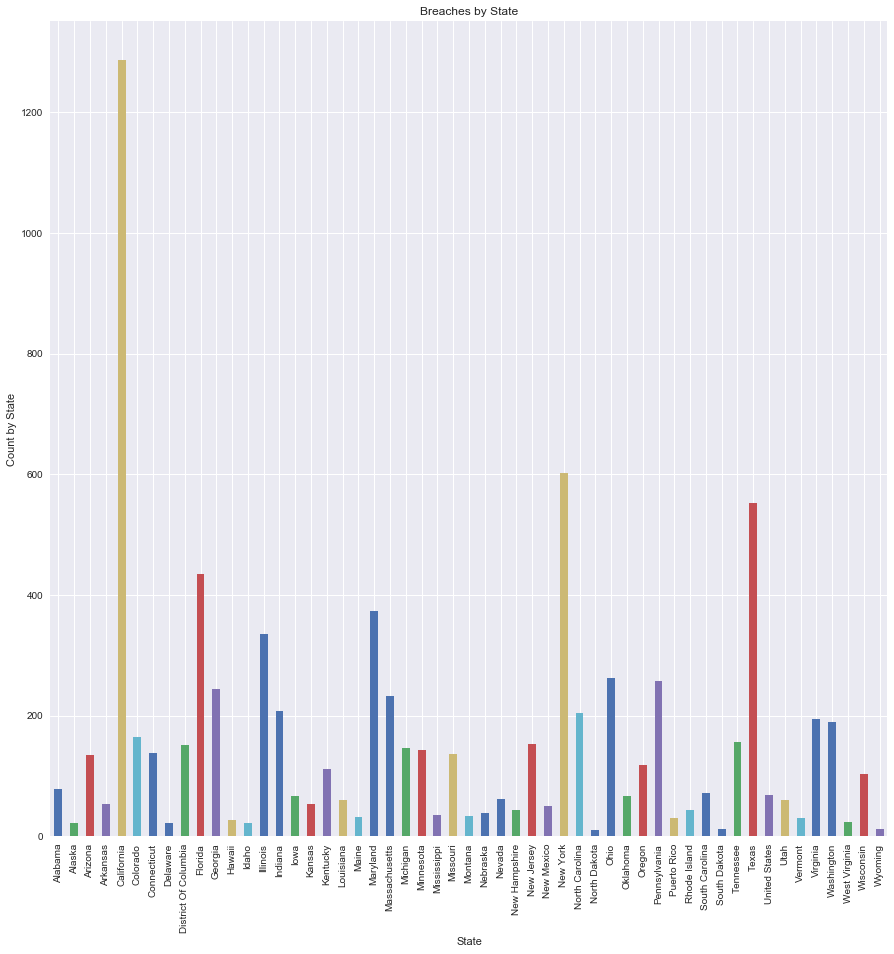

In [34]:
bins = 52
#plt.figure
plt.figure(bins, figsize=(15,15))
breachtype_count.plot(kind='bar')
plt.xlabel('State')
plt.ylabel('Count by State')
plt.title("Breaches by State")

In [35]:
# Breaches by Breach Type
bcount = df.groupby('Breach_Type').size()

Text(0.5,1,'Total Records by Breach Type')

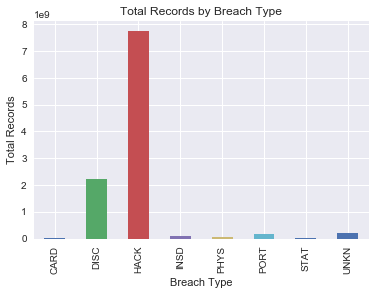

In [36]:
bt_count = df.groupby('Breach_Type').Total_Recs.sum()
plt.figure
bt_count.plot(kind='bar')
plt.xlabel('Breach Type')
plt.ylabel('Total Records')
plt.title("Total Records by Breach Type")

#### Hacking has the biggest impact in terms of total records affected.

Text(0.5,1,'Breach Occurrences by Breach Type')

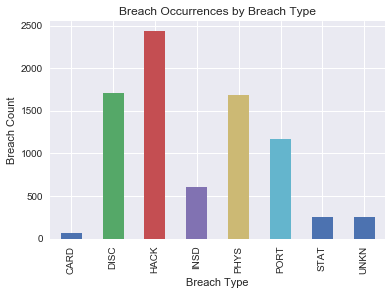

In [37]:
plt.figure
bcount.plot(kind='bar')
plt.xlabel('Breach Type')
plt.ylabel('Breach Count')
plt.title("Breach Occurrences by Breach Type")

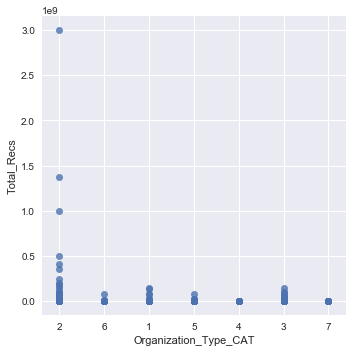

In [38]:
# draw a scatter chart: Total Records Breached vs Organization Type 
sns.lmplot('Organization_Type_CAT', 'Total_Recs', data=df, fit_reg=False)

In [39]:
## Effect of Breach Type by State
breachStCount = df.groupby(['State', 'Breach_Type']).size()


In [44]:
# Convert back to integer 
df['Breach_Type_CAT'] = df['Breach_Type_CAT'].astype(int)
df['Organization_Type_CAT'] = df['Organization_Type_CAT'].astype(int)
df['State_CAT'] = df['State_CAT'].astype(int)
df['Year_CAT'] = df['Year_CAT'].astype(int)
df.head()

,Breach_Year,Company,State,Breach_Type,Organization_Type,Total_Recs,Description,Breach_Type_CAT,Organization_Type_CAT,State_CAT,Year_CAT,GDP
0,2006,Deloitte & Touche McAfee,United States,PORT,BSO,9290,"An external auditor lost a CD with names, Soci...",5,2,0,2,72466970
1,2007,TennCare Americhoice Inc.,United States,PORT,MED,67000,"There are 67,000 TennCare \r\n enro...",5,6,0,3,75725457
2,2007,Mercer Health and Benefits,United States,PORT,BSF,10500,A laptop computer was stolen from a vehicle.,5,1,0,3,75725457
3,2007,Fidelity Investments Dairy Farmers of America,United States,PORT,BSF,69,A Fidelity laptop used by a former Fidelity em...,5,1,0,3,75725457
4,2007,Dai Nippon,United States,INSD,BSO,0,A former contract worker of a Japanese commerc...,3,2,0,3,75725457


In [45]:
#correlation analysis
df.corr()

,Total_Recs,Breach_Type_CAT,Organization_Type_CAT,State_CAT,Year_CAT,GDP
Total_Recs,1.000000,-0.014990,-0.041960,-0.010136,0.026553,0.021366
Breach_Type_CAT,-0.014990,1.000000,0.170874,0.038525,-0.105561,-0.013069
Organization_Type_CAT,-0.041960,0.170874,1.000000,0.047470,0.188673,-0.075590
State_CAT,-0.010136,0.038525,0.047470,1.000000,-0.066180,-0.249137
Year_CAT,0.026553,-0.105561,0.188673,-0.066180,1.000000,0.043187
GDP,0.021366,-0.013069,-0.075590,-0.249137,0.043187,1.000000


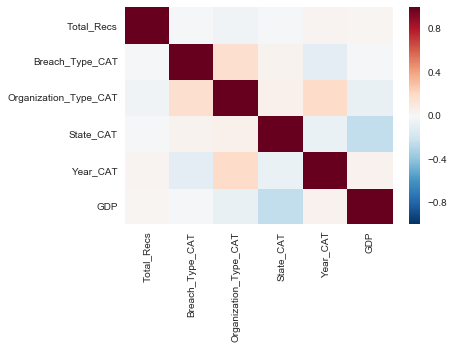

In [46]:
#correlation in a map or a chart 
sns.heatmap(df.corr())

In [47]:
#correlation between State and Total_Recs
df[['State_CAT','Total_Recs']].corr()


,State_CAT,Total_Recs
State_CAT,1.000000,-0.010136
Total_Recs,-0.010136,1.000000


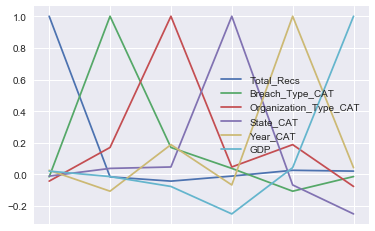

In [48]:
dfcorr = df.corr()
dfplot = dfcorr.plot()
dfplot

In [49]:
dfcorr


,Total_Recs,Breach_Type_CAT,Organization_Type_CAT,State_CAT,Year_CAT,GDP
Total_Recs,1.000000,-0.014990,-0.041960,-0.010136,0.026553,0.021366
Breach_Type_CAT,-0.014990,1.000000,0.170874,0.038525,-0.105561,-0.013069
Organization_Type_CAT,-0.041960,0.170874,1.000000,0.047470,0.188673,-0.075590
State_CAT,-0.010136,0.038525,0.047470,1.000000,-0.066180,-0.249137
Year_CAT,0.026553,-0.105561,0.188673,-0.066180,1.000000,0.043187
GDP,0.021366,-0.013069,-0.075590,-0.249137,0.043187,1.000000


In [51]:
import warnings
warnings.filterwarnings(action= 'ignore')  # To ignore all warnings that arise here to enhance clarity

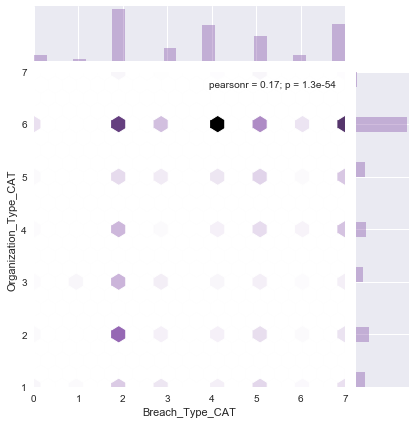

In [52]:
# jointplot for Breach Type and Organization Type
sns.jointplot("Breach_Type_CAT", "Organization_Type_CAT", df, kind="hex", color="#8855AA")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001175A7B8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000011F857F0>]], dtype=object)

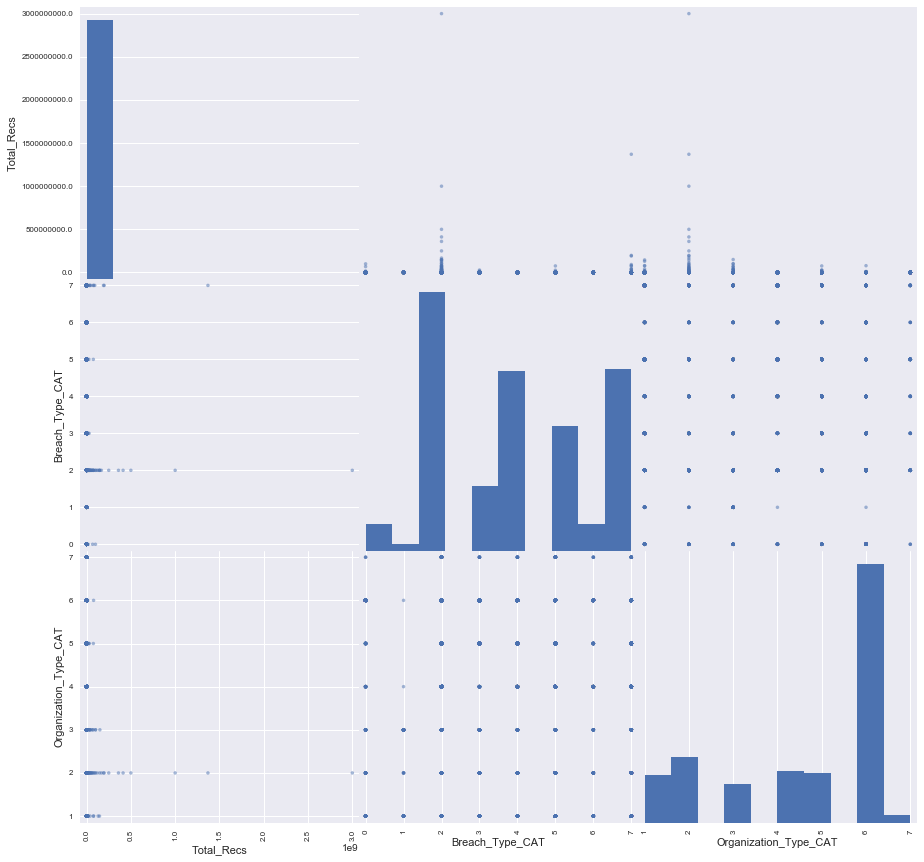

In [53]:
# plot scatter matrix
plotting.scatter_matrix(df[['Total_Recs', 'Breach_Type_CAT', 'Organization_Type_CAT']], figsize=(15,15)) 

In [54]:
# Describe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8177 entries, 0 to 8176
Data columns (total 12 columns):
Breach_Year              8177 non-null object
Company                  8177 non-null object
State                    8177 non-null object
Breach_Type              8177 non-null object
Organization_Type        8177 non-null object
Total_Recs               8177 non-null int64
Description              8177 non-null object
Breach_Type_CAT          8177 non-null int32
Organization_Type_CAT    8177 non-null int32
State_CAT                8177 non-null int32
Year_CAT                 8177 non-null int32
GDP                      8177 non-null int64
dtypes: int32(4), int64(2), object(6)
memory usage: 638.9+ KB


In [55]:
Breach_Type_dm = pd.get_dummies(df['Breach_Type_CAT'], prefix='Breach_Type')
df_corr = df.join(Breach_Type_dm)
df_corr.head()

,Breach_Year,Company,State,Breach_Type,Organization_Type,Total_Recs,Description,Breach_Type_CAT,Organization_Type_CAT,State_CAT,Year_CAT,GDP,Breach_Type_0,Breach_Type_1,Breach_Type_2,Breach_Type_3,Breach_Type_4,Breach_Type_5,Breach_Type_6,Breach_Type_7
0,2006,Deloitte & Touche McAfee,United States,PORT,BSO,9290,"An external auditor lost a CD with names, Soci...",5,2,0,2,72466970,0,0,0,0,0,1,0,0
1,2007,TennCare Americhoice Inc.,United States,PORT,MED,67000,"There are 67,000 TennCare \r\n enro...",5,6,0,3,75725457,0,0,0,0,0,1,0,0
2,2007,Mercer Health and Benefits,United States,PORT,BSF,10500,A laptop computer was stolen from a vehicle.,5,1,0,3,75725457,0,0,0,0,0,1,0,0
3,2007,Fidelity Investments Dairy Farmers of America,United States,PORT,BSF,69,A Fidelity laptop used by a former Fidelity em...,5,1,0,3,75725457,0,0,0,0,0,1,0,0
4,2007,Dai Nippon,United States,INSD,BSO,0,A former contract worker of a Japanese commerc...,3,2,0,3,75725457,0,0,0,1,0,0,0,0


In [56]:
Organization_Type_dm = pd.get_dummies(df_corr['Organization_Type_CAT'], prefix='Organization_Type')
df_corr = df_corr.join(Organization_Type_dm)
df_corr.head()

,Breach_Year,Company,State,Breach_Type,Organization_Type,Total_Recs,Description,Breach_Type_CAT,Organization_Type_CAT,State_CAT,...,Breach_Type_5,Breach_Type_6,Breach_Type_7,Organization_Type_1,Organization_Type_2,Organization_Type_3,Organization_Type_4,Organization_Type_5,Organization_Type_6,Organization_Type_7
0,2006,Deloitte & Touche McAfee,United States,PORT,BSO,9290,"An external auditor lost a CD with names, Soci...",5,2,0,...,1,0,0,0,1,0,0,0,0,0
1,2007,TennCare Americhoice Inc.,United States,PORT,MED,67000,"There are 67,000 TennCare \r\n enro...",5,6,0,...,1,0,0,0,0,0,0,0,1,0
2,2007,Mercer Health and Benefits,United States,PORT,BSF,10500,A laptop computer was stolen from a vehicle.,5,1,0,...,1,0,0,1,0,0,0,0,0,0
3,2007,Fidelity Investments Dairy Farmers of America,United States,PORT,BSF,69,A Fidelity laptop used by a former Fidelity em...,5,1,0,...,1,0,0,1,0,0,0,0,0,0
4,2007,Dai Nippon,United States,INSD,BSO,0,A former contract worker of a Japanese commerc...,3,2,0,...,0,0,0,0,1,0,0,0,0,0


In [57]:
Year_dm = pd.get_dummies(df_corr['Year_CAT'], prefix='Year')
df_corr = df_corr.join(Year_dm)
df_corr.head()

,Breach_Year,Company,State,Breach_Type,Organization_Type,Total_Recs,Description,Breach_Type_CAT,Organization_Type_CAT,State_CAT,...,Year_5,Year_6,Year_7,Year_8,Year_9,Year_10,Year_11,Year_12,Year_13,Year_14
0,2006,Deloitte & Touche McAfee,United States,PORT,BSO,9290,"An external auditor lost a CD with names, Soci...",5,2,0,...,0,0,0,0,0,0,0,0,0,0
1,2007,TennCare Americhoice Inc.,United States,PORT,MED,67000,"There are 67,000 TennCare \r\n enro...",5,6,0,...,0,0,0,0,0,0,0,0,0,0
2,2007,Mercer Health and Benefits,United States,PORT,BSF,10500,A laptop computer was stolen from a vehicle.,5,1,0,...,0,0,0,0,0,0,0,0,0,0
3,2007,Fidelity Investments Dairy Farmers of America,United States,PORT,BSF,69,A Fidelity laptop used by a former Fidelity em...,5,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2007,Dai Nippon,United States,INSD,BSO,0,A former contract worker of a Japanese commerc...,3,2,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
#Drop columns Latitude and Longitude for now.
df_corr = df_corr.drop(['GDP', 'Description', 'Breach_Year', 'Company', 'State', 'Breach_Type', 'Organization_Type'], axis=1)
df_corr.head()

,Total_Recs,Breach_Type_CAT,Organization_Type_CAT,State_CAT,Year_CAT,Breach_Type_0,Breach_Type_1,Breach_Type_2,Breach_Type_3,Breach_Type_4,...,Year_5,Year_6,Year_7,Year_8,Year_9,Year_10,Year_11,Year_12,Year_13,Year_14
0,9290,5,2,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,67000,5,6,0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,10500,5,1,0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,69,5,1,0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,3,2,0,3,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
#Drop columns Latitude and Longitude for now.
df_corr = df_corr.drop(['Breach_Type_CAT', 'Organization_Type_CAT', 'Year_CAT'], axis=1)
df_corr.head()

,Total_Recs,State_CAT,Breach_Type_0,Breach_Type_1,Breach_Type_2,Breach_Type_3,Breach_Type_4,Breach_Type_5,Breach_Type_6,Breach_Type_7,...,Year_5,Year_6,Year_7,Year_8,Year_9,Year_10,Year_11,Year_12,Year_13,Year_14
0,9290,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,67000,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,10500,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,69,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
#Drop columns Latitude and Longitude for now.
df_corr = df_corr.drop(['State_CAT'], axis=1)
df_corr.head()

,Total_Recs,Breach_Type_0,Breach_Type_1,Breach_Type_2,Breach_Type_3,Breach_Type_4,Breach_Type_5,Breach_Type_6,Breach_Type_7,Organization_Type_1,...,Year_5,Year_6,Year_7,Year_8,Year_9,Year_10,Year_11,Year_12,Year_13,Year_14
0,9290,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,67000,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,10500,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,69,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
#correlation analysis
df_corr.corr()

,Total_Recs,Breach_Type_0,Breach_Type_1,Breach_Type_2,Breach_Type_3,Breach_Type_4,Breach_Type_5,Breach_Type_6,Breach_Type_7,Organization_Type_1,...,Year_5,Year_6,Year_7,Year_8,Year_9,Year_10,Year_11,Year_12,Year_13,Year_14
Total_Recs,1.000000,-0.002099,-0.002658,0.031210,-0.008220,-0.016264,-0.011633,-0.005458,0.000237,-0.003372,...,-0.001662,-0.009226,-0.005916,-0.008306,-0.009493,0.001693,-0.002722,0.037231,0.013690,0.000845
Breach_Type_0,-0.002099,1.000000,-0.016229,-0.115273,-0.050273,-0.090490,-0.072490,-0.031408,-0.091063,0.035306,...,-0.008955,0.020612,0.028953,0.030153,0.032744,0.011420,-0.032737,-0.053742,-0.044510,0.000488
Breach_Type_1,-0.002658,-0.016229,1.000000,-0.059564,-0.025977,-0.046758,-0.037457,-0.016229,-0.047054,0.083232,...,0.013138,0.028717,0.033984,0.015912,0.017256,-0.023282,-0.024326,-0.025717,-0.025815,-0.004794
Breach_Type_2,0.031210,-0.115273,-0.059564,1.000000,-0.184513,-0.332118,-0.266054,-0.115273,-0.334222,-0.010950,...,-0.041205,-0.118935,-0.066434,-0.015712,-0.058062,0.073389,0.032086,0.133868,0.176249,0.074993
Breach_Type_3,-0.008220,-0.050273,-0.025977,-0.184513,1.000000,-0.144844,-0.116032,-0.050273,-0.145762,0.073509,...,0.025544,0.069487,0.054161,0.035003,0.048096,-0.012075,-0.047199,-0.074902,-0.065701,-0.040905
Breach_Type_4,-0.016264,-0.090490,-0.046758,-0.332118,-0.144844,1.000000,-0.208854,-0.090490,-0.262367,-0.094666,...,-0.005132,0.093812,0.064507,0.045363,0.032425,0.020943,0.021338,-0.046920,-0.060694,-0.030963
Breach_Type_5,-0.011633,-0.072490,-0.037457,-0.266054,-0.116032,-0.208854,1.000000,-0.072490,-0.210177,0.065546,...,0.045150,0.033102,0.007163,-0.017344,-0.012699,-0.098909,-0.049585,-0.077638,-0.103282,-0.081294
Breach_Type_6,-0.005458,-0.031408,-0.016229,-0.115273,-0.050273,-0.090490,-0.072490,1.000000,-0.091063,0.010588,...,0.006949,0.030189,0.009658,-0.011146,-0.004530,-0.043509,-0.038474,-0.056132,-0.049960,-0.035998
Breach_Type_7,0.000237,-0.091063,-0.047054,-0.334222,-0.145762,-0.262367,-0.210177,-0.091063,1.000000,-0.035339,...,-0.006060,-0.061039,-0.054640,-0.046775,-0.002919,0.008440,0.051423,0.063716,0.039461,0.059102
Organization_Type_1,-0.003372,0.035306,0.083232,-0.010950,0.073509,-0.094666,0.065546,0.010588,-0.035339,1.000000,...,0.000655,0.034182,-0.031506,-0.011592,-0.026037,-0.051793,-0.008856,-0.053277,-0.019388,0.014024


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001272B860>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000013A56400>]], dtype=object)

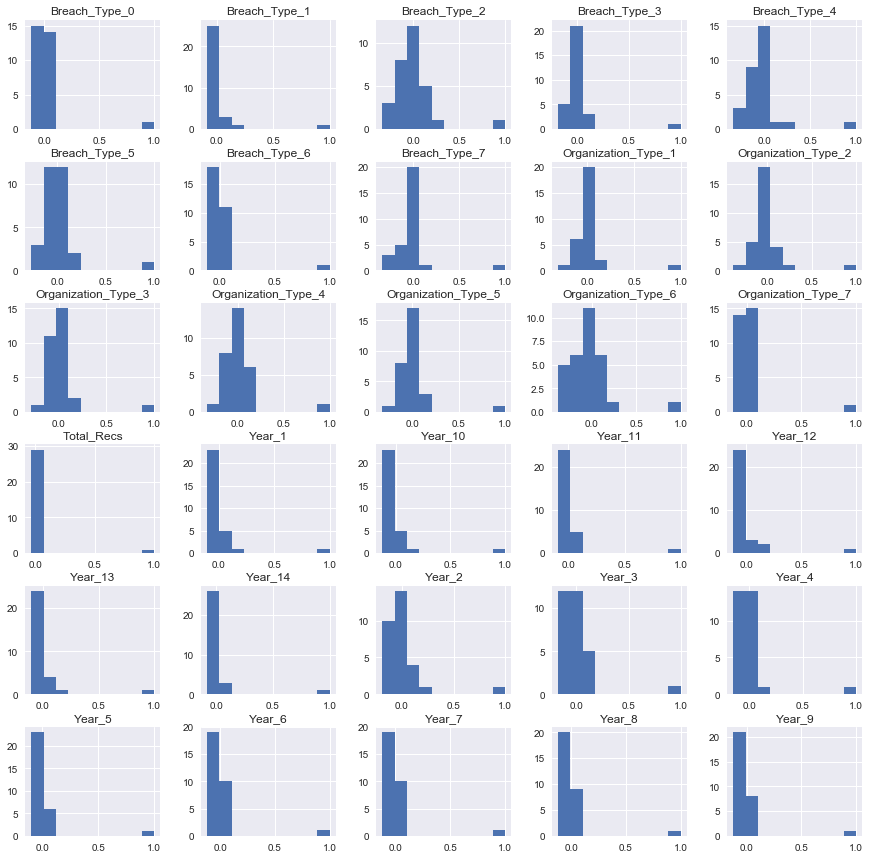

In [63]:
#correlation hot map or graph
# correlation plot
datacorr = df_corr.corr()
datacorr.hist(figsize=(15,15))

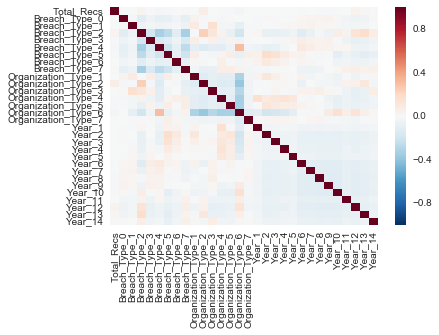

In [64]:
#correlation hot map or graph
sns.heatmap(df_corr.corr())

### Conduct Hypothesis Testing, and provide insights from EDA. 

## Normality test

(array([  3.33088745e-09,   1.22294240e-12,   0.00000000e+00,
          4.07647466e-13,   4.07647466e-13,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          4.07647466e-13]),
 array([  0.00000000e+00,   3.00000000e+08,   6.00000000e+08,
          9.00000000e+08,   1.20000000e+09,   1.50000000e+09,
          1.80000000e+09,   2.10000000e+09,   2.40000000e+09,
          2.70000000e+09,   3.00000000e+09]),
 <a list of 10 Patch objects>)

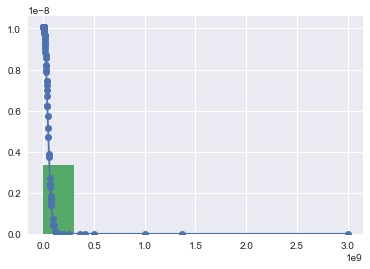

In [65]:
# an illustration of normal distribution

h = sorted(df['Total_Recs'])
fit = stats.norm.pdf(h, np.mean(h), np.std(h))  #this is a fitting indeed
plt.plot(h,fit,'-o')
plt.hist(h,normed=True)      #use this to draw histogram of your data

(array([ 0.04350181,  0.01188001,  0.42471042,  0.        ,  0.10639599,
         0.29542794,  0.        ,  0.2047555 ,  0.04350181,  0.29839795]),
 array([ 0. ,  0.7,  1.4,  2.1,  2.8,  3.5,  4.2,  4.9,  5.6,  6.3,  7. ]),
 <a list of 10 Patch objects>)

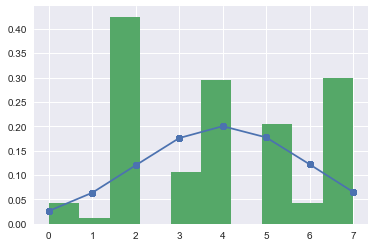

In [66]:
# an illustration of normal distribution with tip
h = sorted(df['Breach_Type_CAT'])
fit = stats.norm.pdf(h, np.mean(h), np.std(h))  #this is a fitting indeed
plt.plot(h,fit,'-o')
plt.hist(h,normed=True)      #use this to draw histogram of your data


(array([ 0.1520525 ,  0.2095308 ,  0.        ,  0.1253516 ,  0.        ,
         0.16672781,  0.15796339,  0.        ,  0.83098936,  0.0240512 ]),
 array([ 1. ,  1.6,  2.2,  2.8,  3.4,  4. ,  4.6,  5.2,  5.8,  6.4,  7. ]),
 <a list of 10 Patch objects>)

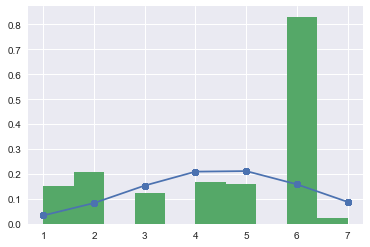

In [67]:
# an illustration of normal distribution with tip
h = sorted(df['Organization_Type_CAT'])
fit = stats.norm.pdf(h, np.mean(h), np.std(h))  #this is a fitting indeed
plt.plot(h,fit,'-o')
plt.hist(h,normed=True)      #use this to draw histogram of your data

In [68]:
# test if the data is normally distributed

import scipy.stats as stats

print stats.normaltest(df['Breach_Type_CAT'])
print stats.normaltest(df['Organization_Type_CAT'])


NormaltestResult(statistic=2466.9176883954428, pvalue=0.0)
NormaltestResult(statistic=2096.1402305265028, pvalue=0.0)


In [69]:
print stats.normaltest(df['Total_Recs'])

NormaltestResult(statistic=27636.699707096992, pvalue=0.0)
